- Run first notebnook before using this one
- [Official HuggingFace tutorial](https://huggingface.co/blog/stable_diffusion)

In [1]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from time import time
from slugify import slugify

- Load model from disk (you only have it if you ran successfully the first notebook)

In [2]:
model = StableDiffusionPipeline.from_pretrained(
    'models/stable-diffusion-v1.4',
    revision='fp16',
    torch_dtype=torch.float16
)
model.to('cuda')
model.device

device(type='cuda', index=0)

- Set random seed for repeatability

In [3]:
seed_generator = torch.Generator('cuda').manual_seed(42)

- Generate image from prompt

0it [00:00, ?it/s]

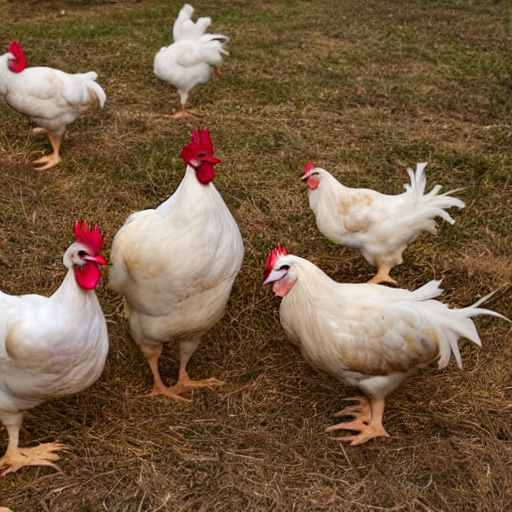

In [4]:
prompt      = "chickens"

with autocast('cuda'):
    output = model(
        prompt,
        generator=seed_generator,
        num_inference_steps=50, # diffusion iterations
        guidance_scale=7.5,     # adherence to text, default 7.5
        width=512,
        height=512,
    )

    image = output['sample'][0]
    image.save(f'images/{time()}_{slugify(prompt[:100])}.png')
    display(image)